In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix , accuracy_score

In [ ]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data preprocessing

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.replace({'Geography':{'France':0,'Germany':1,'Spain':2},'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
X=dataset.iloc[:,3:13].values
Y=dataset.iloc[:,13].values

In [ ]:
print(X)
print(Y)

[[6.1900000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]
[1 0 1 ... 1 1 0]


Train test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((8000, 10), (2000, 10))

Feature Scaling

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train,X_test

(array([[ 0.16958176,  1.51919821,  1.09168714, ...,  0.64259497,
         -1.03227043,  1.10643166],
        [-2.30455945,  0.3131264 , -0.91601335, ...,  0.64259497,
          0.9687384 , -0.74866447],
        [-1.19119591, -0.89294542,  1.09168714, ...,  0.64259497,
         -1.03227043,  1.48533467],
        ...,
        [ 0.9015152 , -0.89294542, -0.91601335, ...,  0.64259497,
         -1.03227043,  1.41231994],
        [-0.62420521,  1.51919821,  1.09168714, ...,  0.64259497,
          0.9687384 ,  0.84432121],
        [-0.28401079,  0.3131264 ,  1.09168714, ...,  0.64259497,
         -1.03227043,  0.32472465]]),
 array([[-0.55204276,  0.3131264 ,  1.09168714, ...,  0.64259497,
          0.9687384 ,  1.61085707],
        [-1.31490297, -0.89294542,  1.09168714, ...,  0.64259497,
         -1.03227043,  0.49587037],
        [ 0.57162971,  1.51919821,  1.09168714, ...,  0.64259497,
          0.9687384 , -0.42478674],
        ...,
        [-0.74791227,  1.51919821, -0.91601335, ...,  

In [ ]:
classifier=Sequential()

In [ ]:
#Input Layer
classifier.add(Dense(units=11,activation='relu',input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8009 - loss: 0.5344 - val_accuracy: 0.7955 - val_loss: 0.4576
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8046 - loss: 0.4349 - val_accuracy: 0.8012 - val_loss: 0.4411
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8026 - loss: 0.4329 - val_accuracy: 0.8160 - val_loss: 0.4319
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8289 - loss: 0.4109 - val_accuracy: 0.8217 - val_loss: 0.4211
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8445 - loss: 0.3890 - val_accuracy: 0.8262 - val_loss: 0.4111
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8500 - loss: 0.3757 - val_accuracy: 0.8338 - val_loss: 0.3981
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8526 - loss: 0.3721 - val_accuracy: 0.8383 - val_loss: 0.3871
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8565 - loss: 0.3606 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

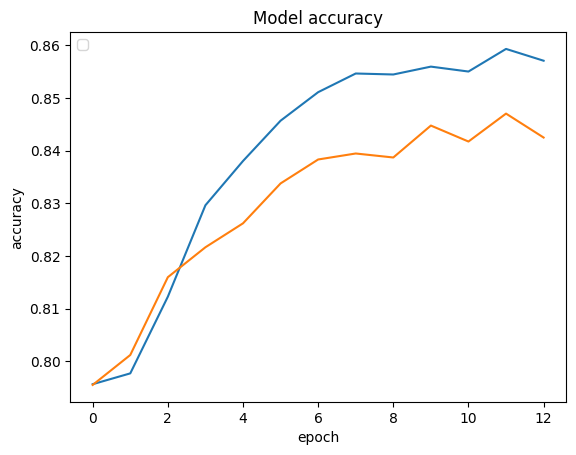

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

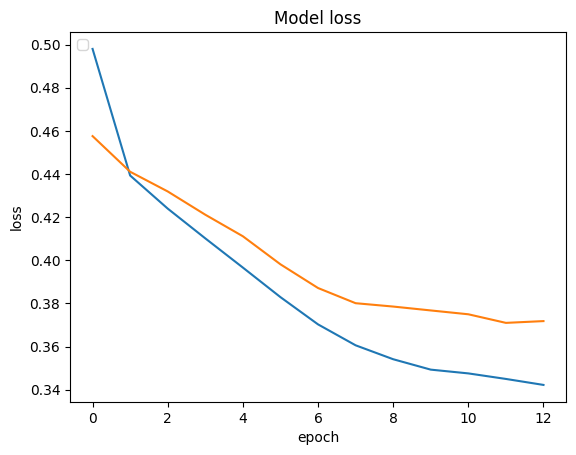

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
y_pred = (y_pred>=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1503,   92],
       [ 205,  200]])

In [ ]:
#calculate the accuracy
score=accuracy_score(y_pred,Y_test)
score

0.8515